# COGS 108 - Final Project 

# Overview

This project explores the health inspections record from late 2012 to late 2016 from the area around the city of Raleigh in the state of North Carolina. The relationship between the number of inspections per day for an inspector and the average score he or she gave on that day was explored in this project. This project concluded that an inspector tent to give higher average score when having more inspections on that day. The result suggests the importance of scheduling and spreading out the work as doing so may help the inspection scores to better represent the actual health and safety situation of the restaurants to hopefully reduce the number of foodborn illness.

# Name & PID

- Name: Yitian Wang
- PID: A15569208

# Research Question

This research project is an Exploratory Data Analysis on whether for a health inspector the amount of inspections per day affects how well he or she conducts the inspections of restaurants. In other words, the goal is to carefully analyze the relationship between the number of inspections per day for a health inspector and the score he or she gave for the restaurants on that day. Because the dataset only contains information about areas near the city of Raleigh in the state of North Carolina, the finding of this research only apply to this particular region.

## Background and Prior Work

Being a health inspector is not an easy job. Foodborne illness is a serious topic and avoiding foodborne illness caused by hazards from the restaurants relied on health inspectors' grading of them. Even health inspectors put their most effort to be fair and catch any violations from the restaurants, report shown that the restaurant grading might not represent the actual health situation in that restaurant (2). To improve the health inspection process and reduce the health inspection bias caused by the health inspectors, one report show studies on the grading of the restaurants tent to get higher in the later of a day when health inspector went through several other restaurants before those restaurants (1). This project intend to do a similar reseach and try to find the relationship of number of inspections per day and the average score the health inspector gave on that day.

References (include links):
- 1)https://hbr.org/2019/05/to-improve-food-inspections-change-the-way-theyre-scheduled
- 2)http://www.wakegov.com/food/healthinspections/rules/Documents/NC%20Food%20Code%20Manual%202009%20FINAL.pdf
- 3)https://www.sgvtribune.com/2015/06/25/what-that-restaurant-letter-grade-isnt-telling-you-about-health-and-cleanliness/

# Hypothesis


For areas around the city of Raleigh in the state of North Carolina, a health inspector tend to give higher scores on average when having more inspections for a day.

# Dataset(s)

The dataset was provided by the COGS 108 SP20 course staff. Information in this dataset only applies to regions around the city of Raleigh in the state of North Carolina

- Dataset Name: inspections.csv
- Link to the dataset: dataset provided by the COGS 108 SP20 course staff
- Number of observations: 18466

There are 36 different features for inspections.csv, including:
- hsisid - an id that matches the individual restaurant
- date - the date of the inspection
- name - the name of the restaurant
- address, city, state, postalcode, and other information regarding the restaurants
- inspectedby, inspector_id - the inspector name and an identification number
- score, num_non_critical, num_critical - information about the inspection
- inspection_num - the number of time this restaurant was inspected
- information about previous inspection records
- information about neighbor restaurants


# Setup

In [1]:
# The setup is based on the setting in the 04_07_eda_example.ipynb from lecture
# Import seaborn and apply its plotting styles
import seaborn as sns
sns.set(style="white", font_scale=2)

# import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
# set plotting size parameter
plt.rcParams['figure.figsize'] = (17, 7)

# make sure pandas & numpy are imported
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# Data Cleaning

First, load the dataset into a dataframe, and name it df_inspect

In [2]:
df_inspect = pd.read_csv('data/inspections.csv')

### Structure
Observing the features and the structure of this dataset

In [3]:
print(df_inspect.columns)
print(df_inspect.shape)
print(df_inspect.dtypes)

Index(['hsisid', 'date', 'name', 'address1', 'address2', 'city', 'state',
       'postalcode', 'phonenumber', 'restaurantopendate',
       'days_from_open_date', 'facilitytype', 'x', 'y', 'geocodestatus', 'zip',
       'type', 'description', 'inspectedby', 'inspection_num', 'inspector_id',
       'previous_inspection_date', 'days_since_previous_inspection',
       'previous_inspection_by_same_inspector', 'score', 'num_critical',
       'num_non_critical', 'num_critical_previous',
       'num_non_critical_previous', 'num_critical_mean_previous',
       'num_non_critical_mean_previous', 'avg_neighbor_num_critical',
       'avg_neighbor_num_non_critical', 'top_match', 'second_match',
       'critical'],
      dtype='object')
(18466, 36)
hsisid                                     int64
date                                      object
name                                      object
address1                                  object
address2                                  object
city       

### Scope
Understand the scope of the dataframe by examinating the information regarding location, and understand this dataset only apply to the state of North Carolina

In [4]:
df_inspect['state'].unique()

array(['NC'], dtype=object)

By further examining the city field, realized that the dataset only apply to the regions near the city of Raleigh

In [5]:
df_inspect['city'].unique()

array(['raleigh', 'cary', 'zebulon', 'wake forest', 'garner', 'apex',
       'morrisville', 'knightdale', 'fuquay-varina', 'holly springs',
       'wendell', 'rolesville', 'new hill', 'clayton', 'willow spring',
       'angier', 'creedmoor'], dtype=object)

### Granularity
To understand the context of hsisid, observe the frequency of the values and see how it matches with other field

In [6]:
df_inspect['hsisid'].value_counts()

4092110059    16
4092090012    16
4092015613    16
4092110101    15
4092110083    15
              ..
4092021943     1
4092017100     1
4092017084     1
4092016995     1
4092021954     1
Name: hsisid, Length: 3045, dtype: int64

By examining the dataframe while excluding sensitive information like phone number, reader can observe that hsisid matches the individual restaurant

In [7]:
df_inspect[df_inspect['hsisid'] == 4092110059][['hsisid', 'date', 'name', 'address1']]

,hsisid,date,name,address1
442,4092110059,2012-11-09T00:00:00Z,Lockhart Elementary Cafeteria,1320 N SMITHFIELD RD
1092,4092110059,2013-01-24T00:00:00Z,Lockhart Elementary Cafeteria,1320 N SMITHFIELD RD
2180,4092110059,2013-04-16T00:00:00Z,Lockhart Elementary Cafeteria,1320 N SMITHFIELD RD
3444,4092110059,2013-08-15T00:00:00Z,Lockhart Elementary Cafeteria,1320 N SMITHFIELD RD
4864,4092110059,2013-12-17T00:00:00Z,Lockhart Elementary Cafeteria,1320 N SMITHFIELD RD
5414,4092110059,2014-02-20T00:00:00Z,Lockhart Elementary Cafeteria,1320 N SMITHFIELD RD
6727,4092110059,2014-06-20T00:00:00Z,Lockhart Elementary Cafeteria,1320 N SMITHFIELD RD
7451,4092110059,2014-08-22T00:00:00Z,Lockhart Elementary Cafeteria,1320 N SMITHFIELD RD
8665,4092110059,2014-12-05T00:00:00Z,Lockhart Elementary Cafeteria,1320 N SMITHFIELD RD
9563,4092110059,2015-02-12T00:00:00Z,Lockhart Elementary Cafeteria,1320 N SMITHFIELD RD


Understanding the scale of the score by sorting the dataframe, observed that the score is out of 100

In [8]:
df_inspect.sort_values(by=['score'], ascending=False)['score']

5710     100.0
8244     100.0
1462     100.0
13051    100.0
7481     100.0
         ...  
4372      77.5
16721     76.0
6598      75.0
11625     75.0
18307     72.5
Name: score, Length: 18466, dtype: float64

Exclude datas that are not relate to the topic of this research and datas that are sensitive for privacy.

In [9]:
df_inspect_short = df_inspect[['hsisid', 'date','inspector_id', 'score', 'num_critical', 'num_non_critical']]

Format the date field from string to datetime, truncate the specific time field since no information is given

In [10]:
#truncate date field
df_inspect_short = df_inspect_short.assign(date = pd.to_datetime(df_inspect_short['date'].str.slice(0,10)))
df_inspect_short.head(10)

,hsisid,date,inspector_id,score,num_critical,num_non_critical
0,4092013748,2012-09-21,27.0,96.0,9,7
1,4092014046,2012-09-21,7.0,98.0,0,11
2,4092015191,2012-09-21,3.0,97.0,4,8
3,4092016122,2012-09-21,24.0,99.0,2,3
4,4092021513,2012-09-21,7.0,97.0,2,4
5,4092110151,2012-09-21,28.0,99.0,0,3
6,4092013134,2012-09-24,18.0,96.0,6,7
7,4092013281,2012-09-24,3.0,95.5,5,14
8,4092110005,2012-09-24,10.0,99.0,2,2
9,4092160070,2012-09-24,1.0,93.5,8,7


### Temporality
To understand the temporality of the data, we sort the date field and observe the first and last element, reader can see the data range from late September 2012 to early November 2016. The data is recent which is good enough for this analysis.

In [11]:
sorted_date = sorted(df_inspect_short['date'].unique())
print(sorted_date[0])
print(sorted_date[-1])

2012-09-21T00:00:00.000000000
2016-11-03T00:00:00.000000000


### Faithfulness
#### missing values
By examine if there are any missing values in the already truncated dataset, observe that there are 5 inspections that the inspection_id is missing

In [12]:
null_rows = df_inspect_short.isnull().any(axis=1)
print(df_inspect_short[null_rows])

          hsisid       date  inspector_id  score  num_critical  \
1731  4092014721 2013-03-13           NaN  100.0             1   
2290  4092020869 2013-04-24           NaN   97.0             2   
2609  4092014108 2013-05-30           NaN   93.0            11   
2894  4092016421 2013-06-20           NaN   95.0             4   
4609  4092016523 2013-11-21           NaN   94.5             5   

      num_non_critical  
1731                 3  
2290                 6  
2609                13  
2894                 4  
4609                 2  


After carefully observing the original dataset, no other information can indicate the missing inspector_id. The missing value might be an error when uploading each inspection record to the dataset, considering there is no clear pattern of why these values are missing.
Also, considering the number of overall cases (18466) versus the missing cases (5), it is safe to drop these missing values as they won't affect the research as much.

In [21]:
df_inspect_short = df_inspect_short.dropna()

#### Distributions
Next, observe the distribution to see if there are any outliers. Following is the statistics of the dataset

In [22]:
df_inspect_short.describe()

,hsisid,inspector_id,score,num_critical,num_non_critical
count,1.846100e+04,18461.000000,18461.000000,18461.000000,18461.000000
mean,4.092039e+09,13.751151,96.235415,2.843833,5.161313
std,6.236026e+04,9.350358,2.654259,2.809294,3.679374
min,4.092010e+09,1.000000,72.500000,0.000000,0.000000
25%,4.092015e+09,6.000000,95.000000,1.000000,3.000000
50%,4.092016e+09,11.000000,97.000000,2.000000,4.000000
75%,4.092022e+09,22.000000,98.000000,4.000000,7.000000
max,4.092300e+09,32.000000,100.000000,23.000000,33.000000


Plot the distributions of score, num_critical, num_non_critical using distplot, note that 
- the range of the score is from 72.5 to 100 with step of 0.5. Therefore, the bins are set to (100 - 72.5)*2 + 1 = 56 to account for each value
- the range of the num_critical is from 0 to 23 with step of 1. Similarly, the bins are set to 24
- the range of the num_non_critical is from 0 to 33 with step of 1. Similarly, the bins are set to 34

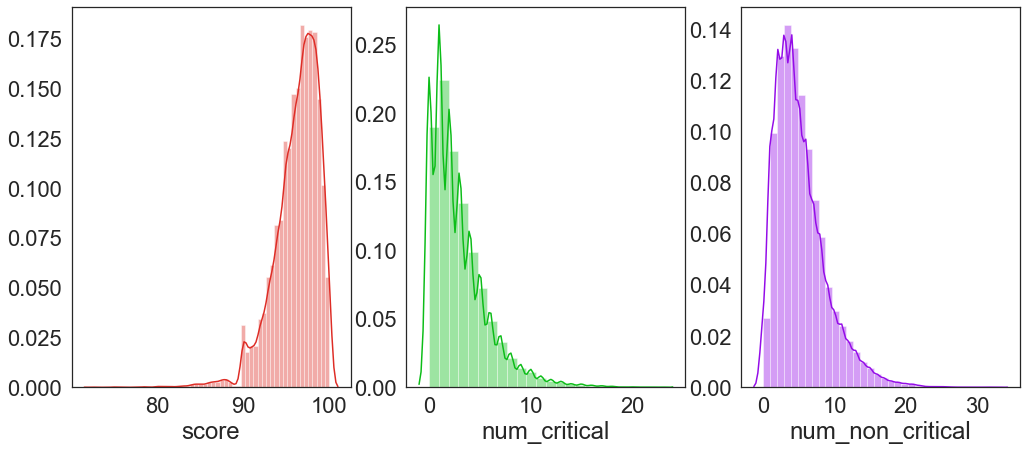

In [37]:
# The subplot and color setup are based on 04_07_eda_example.ipynb from lecture
plt.subplot(1, 3, 1)
sns.distplot(df_inspect_short['score'], bins=56, color='#DE2D26')
plt.subplot(1, 3, 2)
sns.distplot(df_inspect_short['num_critical'], bins=24, color='#0CBD18')
plt.subplot(1, 3, 3)
sns.distplot(df_inspect_short['num_non_critical'], bins=34, color='#940CE8');

The distribution of the score skewed to the left while the distribution of the number of critical violations cited and the distribution of the number of non critical violations cited skewed to the right. These distributions fit the expectation under the setting of grading and scores since most restaurants want to achieve higher scores and have less violation citations.

# Data Analysis & Results

Here, the goal is to find  the relationship between the number of inspections per day for a health inspector and the score he or she gave for the restaurants on that day.
By doing grouping by inspector id and the date and focus only on count, mean, min and max, reader to see the dataset that demonstrate the key statistics for each inspector for each day of his or her work

In [78]:
inspect_stats = df_inspect_short.groupby(['inspector_id', 'date']).agg(['count', 'mean', 'min', 'max'])

Here, the count represent the number of inspections this inspector had on that day, and the mean represent the average (score, amount of citations) he or she gave in that category, and the min and max represent the lowerest and highest (score, amount of citations).

In [79]:
inspect_stats

hsisid                                       score  \
                         count          mean         min         max count   
inspector_id date                                                            
1.0          2012-09-24      1  4.092160e+09  4092160070  4092160070     1   
             2012-09-25      1  4.092110e+09  4092110096  4092110096     1   
             2012-09-26      2  4.092033e+09  4092015179  4092050026     2   
             2012-09-27      2  4.092161e+09  4092020999  4092300175     2   
             2012-10-01      2  4.092061e+09  4092012834  4092110010     2   
...                        ...           ...         ...         ...   ...   
32.0         2013-08-22      1  4.092014e+09  4092013907  4092013907     1   
             2013-08-26      2  4.092014e+09  4092011879  4092015817     2   
             2013-08-27      1  4.092011e+09  4092011070  4092011070     1   
             2013-08-28      1  4.092013e+09  4092012900  4092012900     1   
             2013-08-29      2  4.092018e+09  4092013482  4092021657     2   

                                            num_critical                \
                          mean   min    max        count  mean min max   
inspector_id date                                                        
1.0          2012-09-24  93.50  93.5   93.5            1   8.0   8   8   
             2012-09-25  99.00  99.0   99.0            1   4.0   4   4   
             2012-09-26  97.75  96.5   99.0            2   5.5   5   6   
             2012-09-27  97.50  97.0   98.0            2   7.5   7   8   
             2012-10-01  97.50  95.0  100.0            2   7.0   3  11   
...                        ...   ...    ...          ...   ...  ..  ..   
32.0         2013-08-22  93.00  93.0   93.0            1   9.0   9   9   
             2013-08-26  92.50  92.0   93.0            2  11.0   9  13   
             2013-08-27  92.00  92.0   92.0            1  14.0  14  14   
             2013-08-28  96.00  96.0   96.0            1   4.0   4   4   
             2013-08-29  94.75  91.0   98.5            2   7.5   3  12   

                        num_non_critical                
                                   count  mean min max  
inspector_id date                                       
1.0          2012-09-24                1   7.0   7   7  
             2012-09-25                1   4.0   4   4  
             2012-09-26                2   6.5   6   7  
             2012-09-27                2   3.5   3   4  
             2012-10-01                2   3.5   0   7  
...                                  ...   ...  ..  ..  
32.0         2013-08-22                1   7.0   7   7  
             2013-08-26                2  13.0   9  17  
             2013-08-27                1  10.0  10  10  
             2013-08-28                1   5.0   5   5  
             2013-08-29                2   5.5   1  10  

[11055 rows x 16 columns]

By doing stripplot and boxplot on the the number of inspections per day versus the average score given on each day, reader can see as the number of inspections increases, the variation of average scores decreases.There are many low average scores when the number of inspections per day is low, while the average score on a day with many inspections tend to be higher.

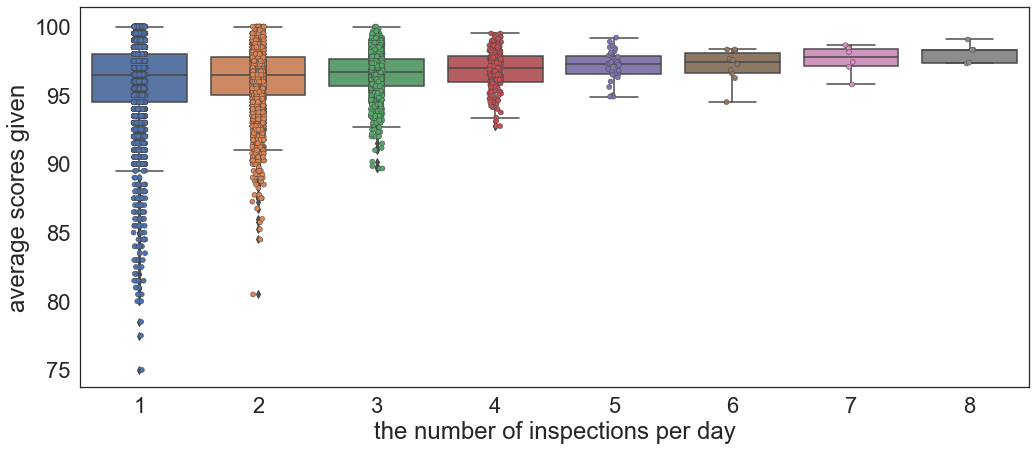

In [85]:
sns.stripplot(x='count', y='mean', data=inspect_stats['score'], jitter=0.05, linewidth=0.5,edgecolor='gray')
ax = sns.boxplot(x='count', y='mean', data=inspect_stats['score'])
ax.set(xlabel='the number of inspections per day', ylabel='average scores given')
plt.show()

In order to finding the center of skewed distributions, the medians of each distribution for different number of inspections per day were analyzed.

In [86]:
df_daily_average_score_median = inspect_stats['score'].groupby(['count']).median()

In [87]:
df_daily_average_score_median

,mean,min,max
count,,,
1,96.500000,96.50,96.50
2,96.500000,95.50,97.50
3,96.666667,95.00,98.50
4,97.000000,95.00,99.00
5,97.300000,96.00,99.00
6,97.416667,95.25,99.25
7,97.785714,95.50,99.50
8,98.312500,96.00,99.50


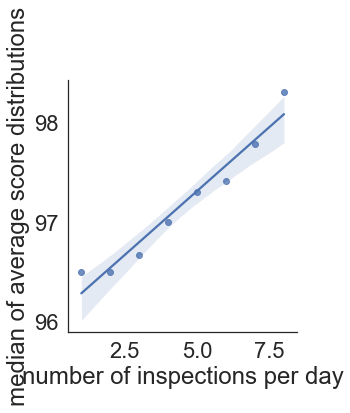

In [90]:
ax = sns.lmplot(x='count', y='mean', data=df_daily_average_score_median.reset_index())
ax.set(xlabel='number of inspections per day', ylabel='median of average score distributions')
plt.show()

Reader can see the plot above indicates that the center of the distribution of average scores given on each day positively correlates with the number of inspections per day, with high correlation.

The following plot demonstrate the relationship between the number of inspections per day and the lowest score given on each day

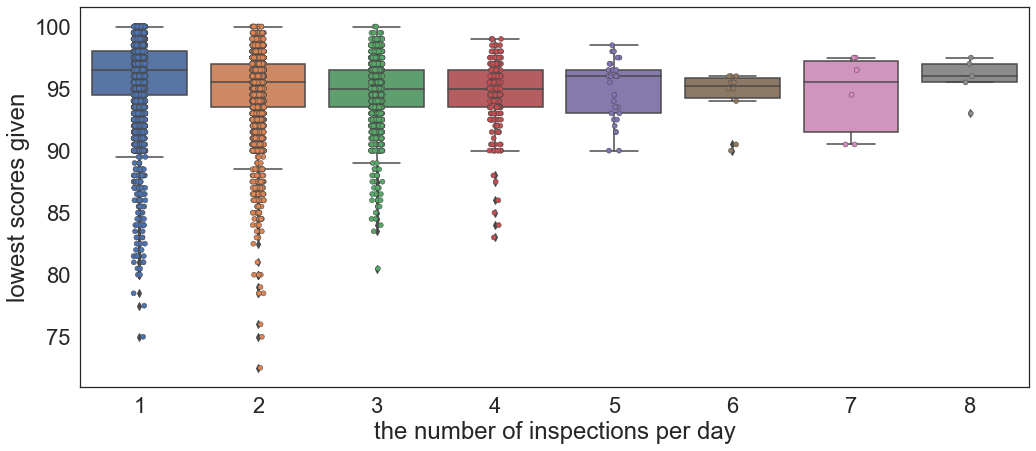

In [80]:
sns.stripplot(x='count', y='min', data=inspect_stats['score'], jitter=0.05, linewidth=0.5,edgecolor='gray')
ax = sns.boxplot(x='count', y='min', data=inspect_stats['score'])
ax.set(xlabel='the number of inspections per day', ylabel='lowest scores given')
plt.show()

As indicated by the plot above and the dataframe below, when there are 5 or more inspections on that day, the lowest score the health inspector gave was greater than 90. This further favors the hypothesis that for areas around the city of Raleigh in the state of North Carolina, a health inspector tend to give less low score on average when having more inspections for a day.

In [81]:
inspect_stats['score'][inspect_stats['score']['count'] >= 5 ]

count       mean   min    max
inspector_id date                                     
1.0          2014-07-15      5  95.000000  93.5   96.5
             2015-05-18      5  95.600000  90.0   99.5
             2015-07-24      5  94.900000  90.0   99.5
             2016-02-22      5  94.900000  91.5   99.5
             2016-10-13      5  96.000000  93.0   97.5
2.0          2014-02-25      5  96.500000  94.0   99.0
             2016-10-07      5  97.100000  91.5   99.5
             2016-10-28      5  96.600000  92.5  100.0
4.0          2015-10-29      5  96.700000  93.0   99.0
6.0          2012-10-26      5  99.200000  98.5  100.0
             2013-01-29      6  98.250000  96.0   99.5
             2013-02-07      7  98.642857  97.5   99.5
             2013-02-19      6  98.333333  95.0   99.5
             2013-02-27      8  99.062500  97.5  100.0
             2013-03-07      5  96.500000  93.5   98.5
             2014-01-27      5  98.500000  97.5  100.0
             2014-09-26      5  97.300000  96.5   98.0
             2014-11-25      5  97.400000  96.0   99.5
             2015-03-31      8  97.312500  95.5   99.5
             2015-04-30      8  98.312500  97.0   99.0
             2015-08-20      7  97.428571  94.5   99.5
             2015-08-31      6  96.250000  90.0   98.5
             2016-01-12      8  97.375000  93.0   99.5
             2016-02-23      6  96.583333  95.0   99.5
             2016-02-27      6  94.500000  90.5   97.5
             2016-02-29      6  97.250000  95.5  100.0
             2016-03-31      5  97.400000  95.5   99.0
7.0          2013-06-08      8  98.312500  96.0   99.5
21.0         2015-05-08      5  97.900000  96.0   99.5
             2015-06-10      5  97.200000  96.0   98.0
             2016-01-21      5  97.500000  96.5   99.0
             2016-02-17      5  98.600000  96.5   99.5
             2016-02-22      5  98.200000  97.0   99.0
             2016-08-18      5  96.900000  96.0   97.5
22.0         2013-03-05      5  97.300000  96.0   99.0
25.0         2013-09-14      5  98.100000  97.5   99.0
             2013-11-02      6  98.333333  96.0   99.5
             2013-12-04      5  96.300000  92.5   98.0
             2014-10-11      6  96.833333  96.0   97.5
             2014-12-04      7  97.071429  90.5   99.5
             2014-12-18      5  97.300000  94.5   99.5
             2015-02-27      7  95.785714  90.5   99.0
             2015-11-22      5  97.400000  97.0   98.0
28.0         2014-06-24      7  98.428571  97.5   99.5
             2014-08-10      7  98.142857  96.5   99.0
             2015-06-11      6  97.666667  95.5   99.0
             2015-08-24      6  97.583333  94.0   99.0
             2016-05-11      5  97.800000  96.5   99.0
29.0         2015-10-30      5  98.400000  98.0   98.5
             2016-01-07      5  96.800000  92.0   99.5
             2016-10-06      5  98.900000  98.0   99.5

# Ethics & Privacy

- The permission of the dataset is granted by the COGS 108 SP20 Staff.
- This project carefully considered ethics and privacy during the research by actively avoiding exposing restaurants' phone number, inspectors' name, etc.
- The research may subject to bias since the dataset only applied to the area around the city of Raleigh in the state of North Carolina, the conclusion may be apply to other areas as general health inspection rules may differ and the population distribution may differ as well.
- To address the problem mentioned above, the hypothesis and the conclusion is limited to the area around the city of Raleigh.

# Conclusion & Discussion

This project analyzed the impact of having too many inspections on a day to the grading of individual restaurants on that day by an inspector. Through analysis this project concludes that having too many inspections per day may lead to health inspectors giving higher scores to the restaurants, causing the score to be not a good representation of actual health and safety situations in those restaurants. To address this problem, local government at the area of Raleigh should schedule and arange the inspections to spread out even more so that the schedule doesn't put too much stress on the health inspectors and affect their grading on the restaurants. This research is limited to the area around Raleigh due to the given dataset. This research couldn't draw the conclusion for the entire United States because this might create bias. To further explore this topic, samples of health inspections could be randomly drawn from the entire United States to avoid potential bias.